### SVM参数调整

In [1]:
# 导包
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

In [23]:
# 数据加载
data = pd.read_csv('data/svm3.txt', sep='\t', header=None)
X, y = data[[0, 1]], data[2]
print(X)
print(y)

      0    1
0   7.0  3.2
1   6.4  3.2
2   6.9  3.1
3   5.5  2.3
4   6.5  2.8
..  ...  ...
95  6.7  3.0
96  6.3  2.5
97  6.5  3.0
98  6.2  3.4
99  5.9  3.0

[100 rows x 2 columns]
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64


In [3]:
# 定义多个候选分类器
clf_params = (('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
                ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100),
    ('rbf', 1, 5), ('rbf', 50, 5), ('rbf', 100, 5), ('rbf', 1000,5))
x1_min, x2_min = np.min(X, axis=0) # 计算每列的最小值
x1_max, x2_max = np.max(X, axis=0) # 计算每列的最大值
print("x1_min: ",x1_min)
print("x2_min: ",x2_min)
print("x1_max: ",x1_max)
print("x2_max: ",x2_max)

x1_min:  4.9
x2_min:  2.0
x1_max:  7.9
x2_max:  3.8


0    4.9
1    2.0
dtype: float64

In [4]:
# 网格点
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j] # 最小值-最大值 切片法均分为200个点生成网格
print(x1)
print(x2)
grid_test = np.stack((x1.flat, x2.flat),axis=1)
print(grid_test)

[[4.9        4.9        4.9        ... 4.9        4.9        4.9       ]
 [4.91507538 4.91507538 4.91507538 ... 4.91507538 4.91507538 4.91507538]
 [4.93015075 4.93015075 4.93015075 ... 4.93015075 4.93015075 4.93015075]
 ...
 [7.86984925 7.86984925 7.86984925 ... 7.86984925 7.86984925 7.86984925]
 [7.88492462 7.88492462 7.88492462 ... 7.88492462 7.88492462 7.88492462]
 [7.9        7.9        7.9        ... 7.9        7.9        7.9       ]]
[[2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]
 [2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]
 [2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]
 ...
 [2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]
 [2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]
 [2.         2.00904523 2.01809045 ... 3.78190955 3.79095477 3.8       ]]
[[4.9        2.        ]
 [4.9        2.00904523]
 [4.9        2.01809045]
 ...
 [7.9        3.78190955]
 [7.9  

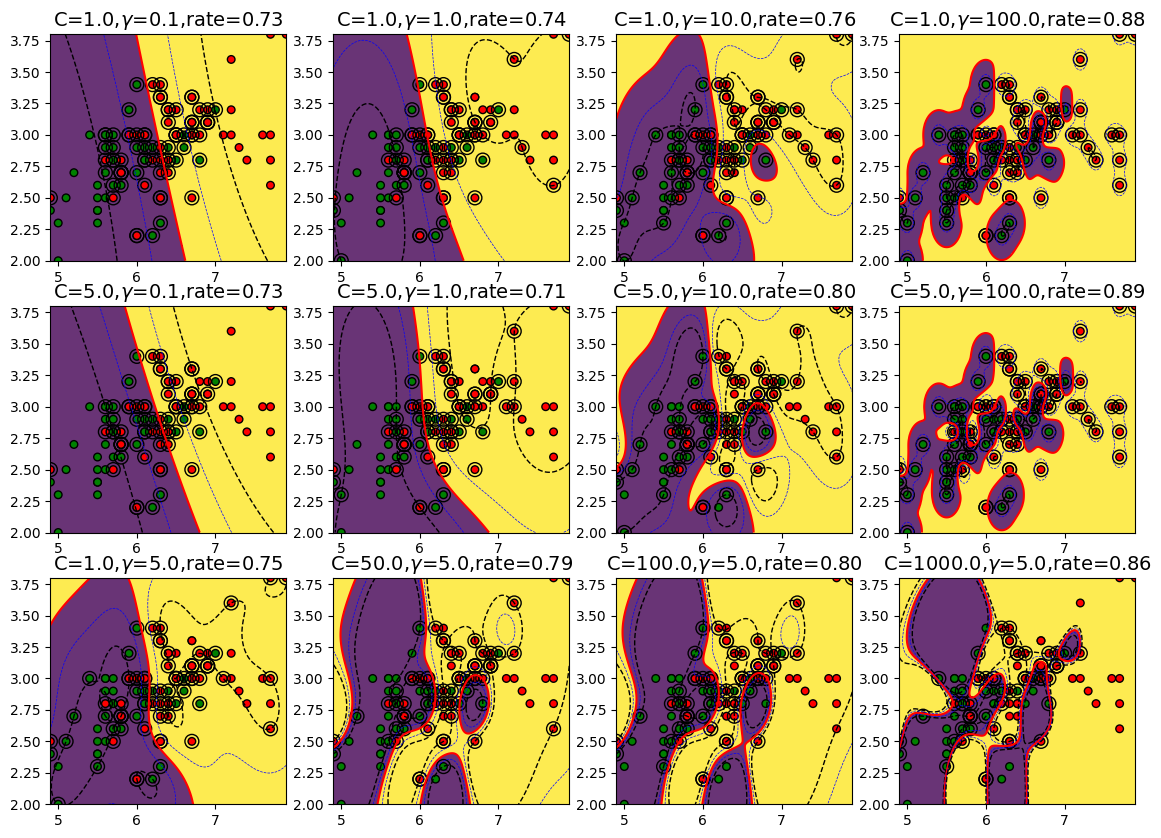

In [15]:
# cm_light = mpl.colors.ListedColormap([''])
cm_dark =  mpl.colors.ListedColormap(['g','r'])
# mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(14, 10), facecolor='w')

# 遍历参数训练
for i, param in enumerate(clf_params):
    clf = svm.SVC(C=param[1],kernel=param[0])
    clf.gamma = param[2]
    clf.fit(X,y)
    y_hat = clf.predict(X) # 样本点预测结果

    title = u'C=%.1f,$\gamma$=%.1f,rate=%.2f' % (param[1],param[2],accuracy_score(y,y_hat))
    plt.subplot(3,4,i+1)
    grid_hat = clf.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape) # 网格点预测结果
    
    plt.pcolormesh(x1,x2,grid_hat,alpha=0.8) # 网格点预测结果显示
    plt.scatter(X[0],X[1],c=y,edgecolors='k',s=30,cmap=cm_dark) # 样本点显示
    plt.scatter(X.loc[clf.support_,0],X.loc[clf.support_,1],edgecolors='k',facecolor='none',s=100,marker='o') # 支撑向量显示

    z = clf.decision_function(grid_test) # 绘制决策平面
    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])
    
    
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.title(title,fontsize=14) # 标题
plt.show()